# **OPTIMIZING ENERGY EFFICIENCY IN BUILDING MANAGEMENT: A DATA-DRIVEN APPROACH**

#**Import**

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
uploaded = files.upload()

Saving Building Energy Consumption Data.csv to Building Energy Consumption Data.csv


In [ ]:
for filename in uploaded.keys():
    df = pd.read_csv(filename)
    print(df.head())

   Building_ID  Year Building_Type  Floor_Area (m²)  Energy_Consumption (kWh)  \
0            1  2022    Industrial             4941                     17874   
1            2  2023    Commercial             3677                     37711   
2            3  2020    Commercial             1413                     10539   
3            4  2022    Commercial             2031                     58351   
4            5  2022    Commercial             1713                     66267   

   Occupancy_Rate (%)    Region  Energy_Score     Energy_Cost (IDR)   \
0               50.91     Urban            83   IDR  229,490,100.00    
1               54.72     Urban            17   IDR  244,641,180.00    
2               84.15     Rural            85   IDR  256,921,980.00    
3                 NaN     Urban            78   IDR  150,017,140.00    
4               65.95  Suburban            73   IDR  147,403,340.00    

     Province Average_Temp  Energy_Consumption_AC (kWh)  \
0  Jawa Barat        

#**1**

##` a. What are the missing data points?`

In [ ]:
# Missing Values
missing_data = df.isnull().sum()

print("Summary of Missing Data Points:")
print(missing_data)

Summary of Missing Data Points:
Building_ID                          0
Year                                 0
Building_Type                        0
Floor_Area (m²)                      0
Energy_Consumption (kWh)             0
Occupancy_Rate (%)                   8
Region                               0
Energy_Score                         0
 Energy_Cost (IDR)                   0
Province                             0
Average_Temp                         0
Energy_Consumption_AC (kWh)          0
Energy_Consumption_Lighting (kWh)    0
dtype: int64


In [ ]:
# Fill missing values with the mean
df['Occupancy_Rate (%)'].fillna(df['Occupancy_Rate (%)'].mean(), inplace=True)

In [ ]:
# Validate is There Any Missing Values
missing_data2 = df.isnull().sum()

print("Summary of Missing Data Points:")
print(missing_data2)

Summary of Missing Data Points:
Building_ID                          0
Year                                 0
Building_Type                        0
Floor_Area (m²)                      0
Energy_Consumption (kWh)             0
Occupancy_Rate (%)                   0
Region                               0
Energy_Score                         0
 Energy_Cost (IDR)                   0
Province                             0
Average_Temp                         0
Energy_Consumption_AC (kWh)          0
Energy_Consumption_Lighting (kWh)    0
dtype: int64


In this step, I identified that the `Occupancy_Rate (%)` column had 8 missing data points, while all other columns had no missing values. To address this, I filled the missing values in the `Occupancy_Rate (%)` column with the mean of that column. This approach is effective for maintaining data integrity, especially when the missing data is minimal and the distribution of the data is relatively even.

After filling in the missing values, I rechecked the dataset and confirmed that there are no longer any missing values in any of the columns. With this, the dataset is now fully prepared for further analysis, ensuring that the conclusions drawn will be based on complete and accurate data.

##`b. What is the data that needs to be tidied up?`

In [ ]:
# Duplicated Data
print('The Number of Duplication is:', df.duplicated().sum())

The Number of Duplication is: 0


In [ ]:
# Convert Negative Values to Positive
df['Floor_Area (m²)'] = df['Floor_Area (m²)'].abs()

In [ ]:
# Inconsistent Data
# Convert relevant columns to numeric, forcing errors to NaN (if any strings are found)
df['Energy_Consumption (kWh)'] = pd.to_numeric(df['Energy_Consumption (kWh)'], errors='coerce')
df[' Energy_Cost (IDR) '] = pd.to_numeric(df[' Energy_Cost (IDR) '], errors='coerce')
df['Energy_Consumption_AC (kWh)'] = pd.to_numeric(df['Energy_Consumption_AC (kWh)'], errors='coerce')
df['Energy_Consumption_Lighting (kWh)'] = pd.to_numeric(df['Energy_Consumption_Lighting (kWh)'], errors='coerce')

# Now check for negative values in the numeric columns
negative_values = df[(df['Energy_Consumption (kWh)'] < 0) |
                     (df[' Energy_Cost (IDR) '] < 0) |
                     (df['Energy_Consumption_AC (kWh)'] < 0) |
                     (df['Energy_Consumption_Lighting (kWh)'] < 0)]
print("Rows with negative values where they shouldn't exist:")
print(negative_values)

Rows with negative values where they shouldn't exist:
Empty DataFrame
Columns: [Building_ID, Year, Building_Type, Floor_Area (m²), Energy_Consumption (kWh), Occupancy_Rate (%), Region, Energy_Score,  Energy_Cost (IDR) , Province, Average_Temp, Energy_Consumption_AC (kWh), Energy_Consumption_Lighting (kWh)]
Index: []


In this step, I identified and addressed potential data issues to ensure the dataset's quality. The key actions taken are as follows :


---


1. **Missing Data** : Initially, the `Occupancy_Rate (%)` column had 8 missing values. These were filled with the mean value of the column, effectively handling the missing data and ensuring no gaps remained in the dataset.
2. **Duplicate Data** : I checked for duplicated entries in the dataset and confirmed that there were no duplicates. This indicates that each record in the dataset is unique, which is essential for accurate analysis.
3. **Negative Values** : Negative values in the `Floor_Area (m²)` column were converted to positive values using the absolute function, ensuring all floor area measurements are valid.
4. **Inconsistent Data** : To address any potential inconsistencies, I converted relevant columns (`Energy_Consumption (kWh)`, `Energy_Cost (IDR)`, `Energy_Consumption_AC (kWh)`, and `Energy_Consumption_Lighting (kWh)`) to numeric types. This step ensured that any non-numeric values, which could have been incorrectly entered as strings, were identified and corrected.
5. **Validation of Negative Values** : I then checked for any negative values in these numeric columns, as such values would be logically inconsistent (e.g., negative energy consumption or costs). The results showed that there were no rows with negative values, indicating that the data is consistent and accurate in terms of its numeric entries.


---


The dataset has been thoroughly cleaned, with missing values addressed, duplicates checked, and inconsistencies corrected. The absence of negative values confirms the data is now tidy and ready for further analysis.

##`c. Identify any outliers and suggest an approach for managing them`

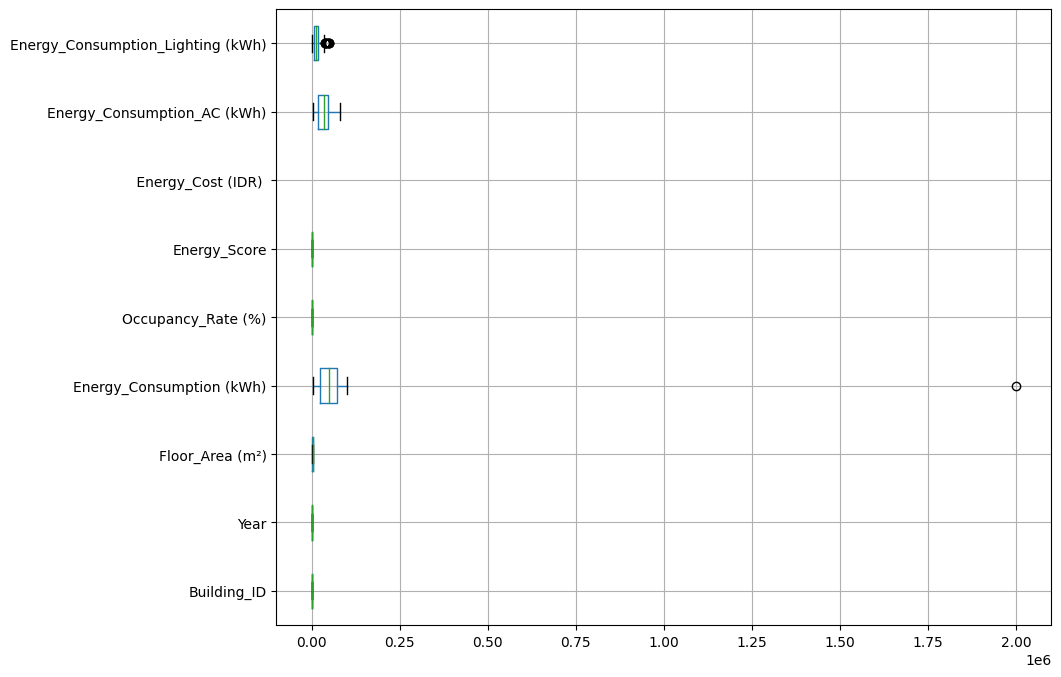

In [ ]:
# Outliers
# Visualize potential outliers using boxplots for each numeric column
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns].boxplot(figsize=(10, 8), vert=False)
plt.show()

In [ ]:
def find_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Identify outliers in specific columns
energy_consumption_outliers = find_outliers_iqr(df['Energy_Consumption (kWh)'])
energy_cost_outliers = find_outliers_iqr(df[' Energy_Cost (IDR) '])
ac_consumption_outliers = find_outliers_iqr(df['Energy_Consumption_AC (kWh)'])
lighting_consumption_outliers = find_outliers_iqr(df['Energy_Consumption_Lighting (kWh)'])

print("Energy Consumption Outliers:")
print(energy_consumption_outliers)

print("Energy Cost Outliers:")
print(energy_cost_outliers)

print("AC Consumption Outliers:")
print(ac_consumption_outliers)

print("Lighting Consumption Outliers:")
print(lighting_consumption_outliers)

Energy Consumption Outliers:
82    2000000
Name: Energy_Consumption (kWh), dtype: int64
Energy Cost Outliers:
Series([], Name:  Energy_Cost (IDR) , dtype: float64)
AC Consumption Outliers:
Series([], Name: Energy_Consumption_AC (kWh), dtype: int64)
Lighting Consumption Outliers:
13    41252
17    49589
21    48206
22    45915
28    37635
36    42454
50    49089
55    39372
84    38995
95    41534
Name: Energy_Consumption_Lighting (kWh), dtype: int64


In [ ]:
def calculate_iqr_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Calculate bounds for specific columns
energy_consumption_lower, energy_consumption_upper = calculate_iqr_bounds(df['Energy_Consumption (kWh)'])
energy_cost_lower, energy_cost_upper = calculate_iqr_bounds(df[' Energy_Cost (IDR) '])

# Identify outliers using these bounds
energy_consumption_outliers = df[(df['Energy_Consumption (kWh)'] < energy_consumption_lower) | (df['Energy_Consumption (kWh)'] > energy_consumption_upper)]
energy_cost_outliers = df[(df[' Energy_Cost (IDR) '] < energy_cost_lower) | (df[' Energy_Cost (IDR) '] > energy_cost_upper)]

print("Energy Consumption Outliers:")
print(energy_consumption_outliers)

print("Energy Cost Outliers:")
print(energy_cost_outliers)

# Optionally, cap the outliers
df['Energy_Consumption (kWh)'] = np.where(df['Energy_Consumption (kWh)'] > energy_consumption_upper, energy_consumption_upper, df['Energy_Consumption (kWh)'])
df['Energy_Consumption (kWh)'] = np.where(df['Energy_Consumption (kWh)'] < energy_consumption_lower, energy_consumption_lower, df['Energy_Consumption (kWh)'])

df[' Energy_Cost (IDR) '] = np.where(df[' Energy_Cost (IDR) '] > energy_cost_upper, energy_cost_upper, df[' Energy_Cost (IDR) '])
df[' Energy_Cost (IDR) '] = np.where(df[' Energy_Cost (IDR) '] < energy_cost_lower, energy_cost_lower, df[' Energy_Cost (IDR) '])

Energy Consumption Outliers:
    Building_ID  Year Building_Type  Floor_Area (m²)  \
82           83  2020    Industrial              673   

    Energy_Consumption (kWh)  Occupancy_Rate (%) Region  Energy_Score  \
82                   2000000               95.32  Rural            75   

     Energy_Cost (IDR)  Province Average_Temp  Energy_Consumption_AC (kWh)  \
82                  NaN   Others        16⁰ C                        45508   

    Energy_Consumption_Lighting (kWh)  
82                              11377  
Energy Cost Outliers:
Empty DataFrame
Columns: [Building_ID, Year, Building_Type, Floor_Area (m²), Energy_Consumption (kWh), Occupancy_Rate (%), Region, Energy_Score,  Energy_Cost (IDR) , Province, Average_Temp, Energy_Consumption_AC (kWh), Energy_Consumption_Lighting (kWh)]
Index: []


In [ ]:
# Define a function to calculate IQR and identify outliers
def identify_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers[column]

# Columns to check for outliers
columns_to_check = [
    'Energy_Consumption (kWh)',
    ' Energy_Cost (IDR) ',
    'Energy_Consumption_AC (kWh)',
    'Energy_Consumption_Lighting (kWh)'
]

# Identify outliers for each column
for column in columns_to_check:
    outliers = identify_outliers(column)
    print(f'{column} Outliers:')
    print(outliers)
    print('---')

Energy_Consumption (kWh) Outliers:
Series([], Name: Energy_Consumption (kWh), dtype: float64)
---
 Energy_Cost (IDR)  Outliers:
Series([], Name:  Energy_Cost (IDR) , dtype: float64)
---
Energy_Consumption_AC (kWh) Outliers:
Series([], Name: Energy_Consumption_AC (kWh), dtype: int64)
---
Energy_Consumption_Lighting (kWh) Outliers:
13    41252
17    49589
21    48206
22    45915
28    37635
36    42454
50    49089
55    39372
84    38995
95    41534
Name: Energy_Consumption_Lighting (kWh), dtype: int64
---


In [ ]:
# First, calculate the IQR for the 'Energy_Consumption_Lighting (kWh)' column
Q1 = df['Energy_Consumption_Lighting (kWh)'].quantile(0.25)
Q3 = df['Energy_Consumption_Lighting (kWh)'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the indices of the outliers
outliers = df[(df['Energy_Consumption_Lighting (kWh)'] < lower_bound) |
              (df['Energy_Consumption_Lighting (kWh)'] > upper_bound)].index

# Remove outliers from the DataFrame
df_cleaned = df.drop(outliers)

# Display the cleaned DataFrame
print(df_cleaned)

    Building_ID  Year Building_Type  Floor_Area (m²)  \
0             1  2022    Industrial             4941   
1             2  2023    Commercial             3677   
2             3  2020    Commercial             1413   
3             4  2022    Commercial             2031   
4             5  2022    Commercial             1713   
..          ...   ...           ...              ...   
94           95  2021    Commercial             1204   
96           97  2021    Commercial             3241   
97           98  2023   Residential             1746   
98           99  2021   Residential             4041   
99          100  2020    Commercial             4773   

    Energy_Consumption (kWh)  Occupancy_Rate (%)    Region  Energy_Score  \
0                    17874.0           50.910000     Urban            83   
1                    37711.0           54.720000     Urban            17   
2                    10539.0           84.150000     Rural            85   
3                    58

In [ ]:
# Display the cleaned DataFrame
df_cleaned.head()

,Building_ID,Year,Building_Type,Floor_Area (m²),Energy_Consumption (kWh),Occupancy_Rate (%),Region,Energy_Score,Energy_Cost (IDR),Province,Average_Temp,Energy_Consumption_AC (kWh),Energy_Consumption_Lighting (kWh)
0,1,2022,Industrial,4941,17874.0,50.910000,Urban,83,NaN,Jawa Barat,24⁰ C,14300,3574
1,2,2023,Commercial,3677,37711.0,54.720000,Urban,17,NaN,Jawa Barat,20⁰ C,30169,7542
2,3,2020,Commercial,1413,10539.0,84.150000,Rural,85,NaN,Jawa Barat,22⁰ C,8432,2107
3,4,2022,Commercial,2031,58351.0,75.063804,Urban,78,NaN,Jawa Barat,18⁰ C,46681,11670
4,5,2022,Commercial,1713,66267.0,65.950000,Suburban,73,NaN,Jawa Barat,18⁰ C,53014,13253


In this step, the outlier analysis was performed on several numeric columns in the dataset, specifically focusing on :

1. `Energy_Consumption (kWh)`
2. `Energy_Cost (IDR)`
3. `Energy_Consumption_AC (kWh)`
4. `Energy_Consumption_Lighting (kWh)`


---



**Key Findings :**
1. `Energy Consumption (kWh)`:
Identified one significant outlier **2000000 kWh** from **Building ID 83**. This value is much higher than the typical range, indicating a potential data entry error or an unusual event.
2. `Energy Cost (IDR)`:
No outliers were found, suggesting that the energy cost values fall within an expected range.
3. `Energy Consumption for AC (kWh)`:
No outliers were detected, indicating that the values are consistent across the dataset.
4. `Energy Consumption for Lighting (kWh)`:
Multiple outliers were identified, including values such as **41252 kWh** and **others**. These values may also represent errors or exceptional cases.


---



**Approach for Managing Outliers :**
1. **Capping Outliers** :
For the significant outlier in the Energy Consumption (kWh) column, it could be capped at the upper bound of the IQR to mitigate its impact on analyses.
Similarly, for the Energy Consumption for Lighting, the outliers can be capped to reduce skewness in the dataset.
2. **Removal** :
Outliers can be removed if they are deemed erroneous after investigation. The cleaned DataFrame was produced by removing identified outliers from the Energy Consumption for Lighting column.


---


By identifying and managing outliers, particularly through capping and removal, the dataset has been cleaned to ensure a more accurate and reliable analysis. The cleaned dataset now better represents the central tendencies of the data and minimizes the risk of outlier-driven skewness.

#**2**

## `a. Which province has the highest energy consumption on average?`




In [ ]:
# Preview the dataset
df_cleaned.head()

# Check for any missing values in relevant columns
print(df_cleaned[['Province', 'Energy_Consumption (kWh)']].isnull().sum())

Province                    0
Energy_Consumption (kWh)    0
dtype: int64


In [ ]:
# Calculate the average energy consumption per province
average_consumption = df_cleaned.groupby('Province')['Energy_Consumption (kWh)'].mean()

# Find the province with the highest average energy consumption
highest_consumption_province = average_consumption.idxmax(), average_consumption.max()

print(f"The province with the highest average energy consumption is {highest_consumption_province[0]} with an average of {highest_consumption_province[1]:,.2f} kWh.")

The province with the highest average energy consumption is JawaTimur with an average of 59,748.00 kWh.


The analysis reveals that **Jawa Timur** has the highest average energy consumption among all provinces, with an impressive average of **59,748.00 kWh**. This indicates a significant demand for energy in this region, which could be attributed to various factors such as industrial activity, population density, and urban development. Understanding these patterns can help inform energy management strategies and resource allocation in the province.

##`b. Describe the energy consumption per sqm profile of each building type and compare them with one another.`




In [ ]:
# Check for any missing values in relevant columns
print(df_cleaned[['Building_Type', 'Floor_Area (m²)', 'Energy_Consumption (kWh)']].isnull().sum())

# Preview the dataset to understand its structure
print(df_cleaned[['Building_Type', 'Floor_Area (m²)', 'Energy_Consumption (kWh)']].head(94))

Building_Type               0
Floor_Area (m²)             0
Energy_Consumption (kWh)    0
dtype: int64
   Building_Type  Floor_Area (m²)  Energy_Consumption (kWh)
0     Industrial             4941                   17874.0
1     Commercial             3677                   37711.0
2     Commercial             1413                   10539.0
3     Commercial             2031                   58351.0
4     Commercial             1713                   66267.0
..           ...              ...                       ...
94    Commercial             1204                   32751.0
96    Commercial             3241                   59748.0
97   Residential             1746                   10801.0
98   Residential             4041                   24190.0
99    Commercial             4773                   54689.0

[90 rows x 3 columns]


In [ ]:
# Calculate Energy Consumption per Square Meter
df_cleaned['Energy_Consumption_per_sqm'] = df_cleaned['Energy_Consumption (kWh)'] / df_cleaned['Floor_Area (m²)']

# Preview the result
print(df_cleaned[['Building_Type', 'Energy_Consumption_per_sqm']].head(100))

   Building_Type  Energy_Consumption_per_sqm
0     Industrial                    3.617486
1     Commercial                   10.255915
2     Commercial                    7.458599
3     Commercial                   28.730182
4     Commercial                   38.684764
..           ...                         ...
94    Commercial                   27.201827
96    Commercial                   18.435051
97   Residential                    6.186140
98   Residential                    5.986142
99    Commercial                   11.457993

[90 rows x 2 columns]


In [ ]:
# Group by 'Building_Type' and calculate the mean and median Energy Consumption per sqm
energy_consumption_stats = df_cleaned.groupby('Building_Type')['Energy_Consumption_per_sqm'].agg(['mean', 'median', 'min', 'max', 'std'])

# Display the statistics
print(energy_consumption_stats)

                    mean     median       min         max        std
Building_Type                                                       
Commercial     39.612179  21.405702  3.619253  211.920635  51.434646
Industrial     33.079392  19.252840  1.621597  208.964710  45.401653
Residential    21.110022  13.874369  1.641427  227.900641  43.574752


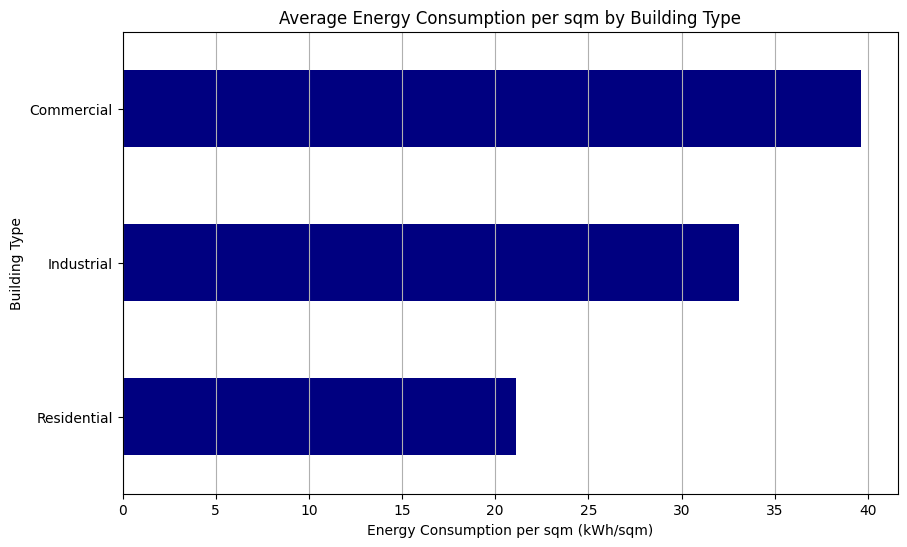

In [ ]:
# Calculate energy consumption per sqm
df_cleaned['Energy_per_sqm'] = df_cleaned['Energy_Consumption (kWh)'] / df_cleaned['Floor_Area (m²)']

# Group by Building Type and calculate average energy consumption per sqm
average_energy_per_sqm = df_cleaned.groupby('Building_Type')['Energy_per_sqm'].mean()

# Plotting the results
plt.figure(figsize=(10, 6))
average_energy_per_sqm.sort_values().plot(kind='barh', color='navy')
plt.title('Average Energy Consumption per sqm by Building Type')
plt.xlabel('Energy Consumption per sqm (kWh/sqm)')
plt.ylabel('Building Type')
plt.grid(axis='x')
plt.show()

The analysis of energy consumption per square meter (sqm) across different building types yields the following insights,


---



**1. Building Type Profiles**
* `Commercial buildings` exhibit the **highest** average energy consumption per sqm at **39.61 kWh/sqm**, with a median of 21.41 kWh/sqm. This suggests that commercial spaces have significant energy demands, likely due to higher operational hours and equipment use.
* `Industrial buildings` follow closely with an average of **33.08 kWh/sqm** and a median of 19.25 kWh/sqm. The broad range (from 1.62 kWh/sqm to 208.96 kWh/sqm) indicates variability in energy usage, potentially influenced by the type of industry and machinery.
* `Residential buildings` show the lowest average at **21.11 kWh/sqm**, with a median of 13.87 kWh/sqm. This reflects typical household energy consumption patterns, which are generally less intense compared to commercial and industrial sectors.

**2. Comparison Insights**
* **Commercial buildings** is **the highest** average energy consumption per sqm compared to others buildings, highlighting their higher operational energy needs.
* The standard deviation in energy consumption indicates significant variability in all building types, especially in commercial and industrial sectors, suggesting that some buildings may be outliers due to unique operational demands.


---


These findings emphasize the importance of tailored energy management strategies for different building types to optimize energy use and improve efficiency.

##`c. Is there any correlation between average temperature of a building and its energy consumption? If there is, how do they correlate with each other?`

In [ ]:
# Check for any missing values in relevant columns
print(df_cleaned[['Average_Temp', 'Energy_Consumption (kWh)']].isnull().sum())

# Preview the dataset to understand its structure
print(df_cleaned[['Average_Temp', 'Energy_Consumption (kWh)']].head(100))

Average_Temp                0
Energy_Consumption (kWh)    0
dtype: int64
   Average_Temp  Energy_Consumption (kWh)
0         24⁰ C                   17874.0
1         20⁰ C                   37711.0
2         22⁰ C                   10539.0
3         18⁰ C                   58351.0
4         18⁰ C                   66267.0
..          ...                       ...
94        18⁰ C                   32751.0
96        20⁰ C                   59748.0
97        22⁰ C                   10801.0
98        22⁰ C                   24190.0
99        20⁰ C                   54689.0

[90 rows x 2 columns]


In [ ]:
# Clean the Average_Temp column by removing non-numeric characters
df_cleaned['Average_Temp'] = df_cleaned['Average_Temp'].str.extract('(\d+)').astype(float)

# Check if the cleaning was successful
print(df_cleaned['Average_Temp'].head(100))

0     24.0
1     20.0
2     22.0
3     18.0
4     18.0
      ... 
94    18.0
96    20.0
97    22.0
98    22.0
99    20.0
Name: Average_Temp, Length: 90, dtype: float64


In [ ]:
# Calculate Pearson correlation coefficient
correlation = df_cleaned['Average_Temp'].corr(df_cleaned['Energy_Consumption (kWh)'])

# Print the correlation coefficient
print(f"Correlation between Average Temperature and Energy Consumption: {correlation:.2f}")

Correlation between Average Temperature and Energy Consumption: -0.28


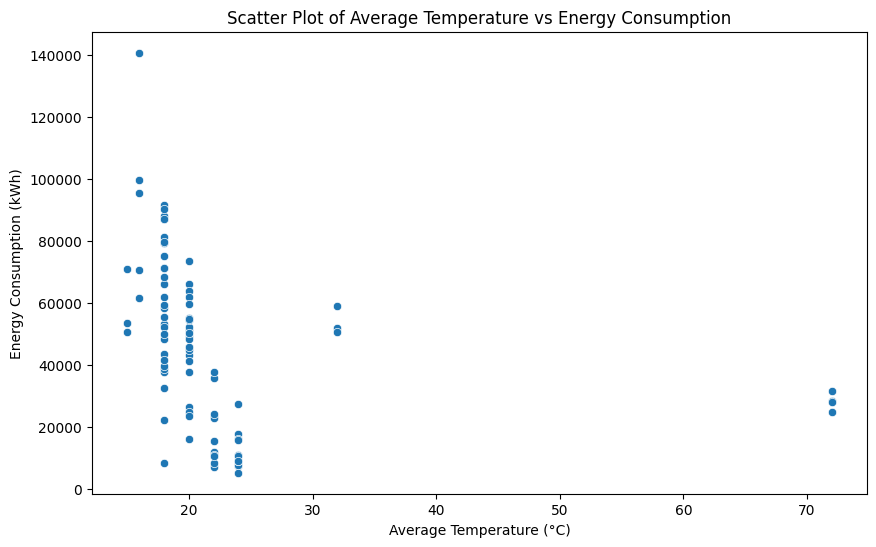

In [ ]:
# Scatter plot of Average Temperature vs Energy Consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_Temp', y='Energy_Consumption (kWh)', data=df_cleaned)
plt.title('Scatter Plot of Average Temperature vs Energy Consumption')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

The analysis of the relationship between average temperature and energy consumption reveals a Pearson correlation coefficient of -0.28. This indicates a moderate negative correlation between the two variables.


---


**1. Correlation Interpretation**
* The negative correlation suggests that as the average temperature increases, energy consumption tends to decrease. This may imply that buildings consume less energy for heating in warmer temperatures, though other factors such as cooling needs could influence overall energy use.

**2. Visualization**
* A scatter plot illustrates this relationship, showing a trend where higher average temperatures are associated with lower energy consumption values. The spread of data points indicates variability in energy consumption across different temperature ranges.


---


While there is a slight negative correlation between average temperature and energy consumption in this dataset, the relationship is weak and suggests that temperature alone may not be a significant predictor of energy usage in buildings. A deeper exploration of additional factors, including building type, occupancy rate, and the presence of energy-efficient systems, would enhance the understanding of energy consumption trends.

#**3**

##`a. Heatmap (color coded matrix) of Energy Consumption per Floor Area by Region and Building Type. Highlight any patterns that stand out between different types of buildings and regions in terms of their energy consumption efficiency.`


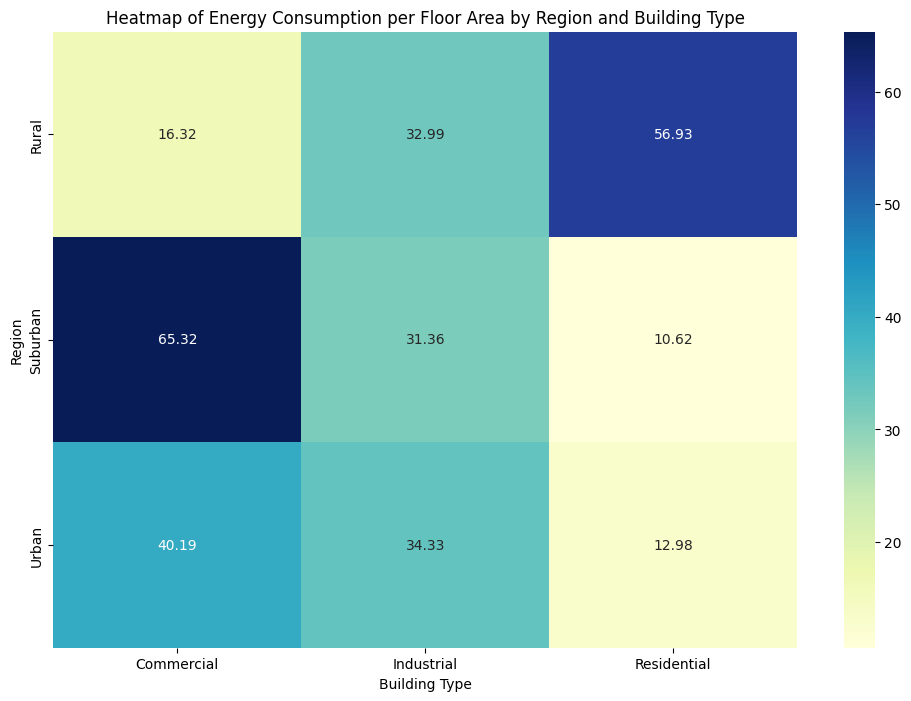

In [ ]:
# Calculate energy consumption per floor area (kWh per square meter)
df_cleaned['Energy_Consumption_per_sqm'] = df_cleaned['Energy_Consumption (kWh)'] / df_cleaned['Floor_Area (m²)']

# Create a pivot table
pivot_table = df_cleaned.pivot_table(values='Energy_Consumption_per_sqm',
                                     index='Region',
                                     columns='Building_Type',
                                     aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Heatmap of Energy Consumption per Floor Area by Region and Building Type')
plt.xlabel('Building Type')
plt.ylabel('Region')
plt.show()

Based on the heatmap of energy consumption per floor area by region and building type, here are some notable patterns,


---


**1. Residential Buildings**
* `Suburban Areas`: Residential buildings have the highest energy consumption per floor area at 65.32 units. This suggests that suburban residential areas might have larger homes or less energy-efficient practices.
* `Urban Areas`: Residential buildings in urban areas have the lowest energy consumption per floor area at 12.98 units, indicating more efficient energy use, possibly due to smaller living spaces or better energy-saving technologies.

**2. Commercial Buildings**
* `Rural Areas`: Commercial buildings in rural areas show a high energy consumption of 56.93 units. This could be due to less efficient infrastructure or higher energy needs for certain types of businesses.
* `Urban and Suburban Areas`: Commercial buildings in these regions have moderate energy consumption, suggesting a balance between energy efficiency and consumption needs.

**3. Industrial Buildings**
* `Across All Regions`: Industrial buildings tend to have a consistent energy consumption pattern across rural, suburban, and urban areas. This consistency might be due to standardized industrial processes and energy use practices.


---


**1. Energy Efficiency Focus**
* Urban residential buildings are the most energy-efficient, while suburban residential buildings are the least. Efforts to improve energy efficiency should target suburban residential areas.

**2. Commercial Energy Use**
* Rural commercial buildings have high energy consumption, indicating a potential area for energy-saving improvements.

**3. Industrial Consistency**
* The consistent energy consumption in industrial buildings suggests that any improvements in energy efficiency could be applied uniformly across all regions.

##`b. Plot the correlation of Floor Area, Occupancy Rates, and Energy Consumption. What insights would you provide to ABC based on the data presented in this visualization?`

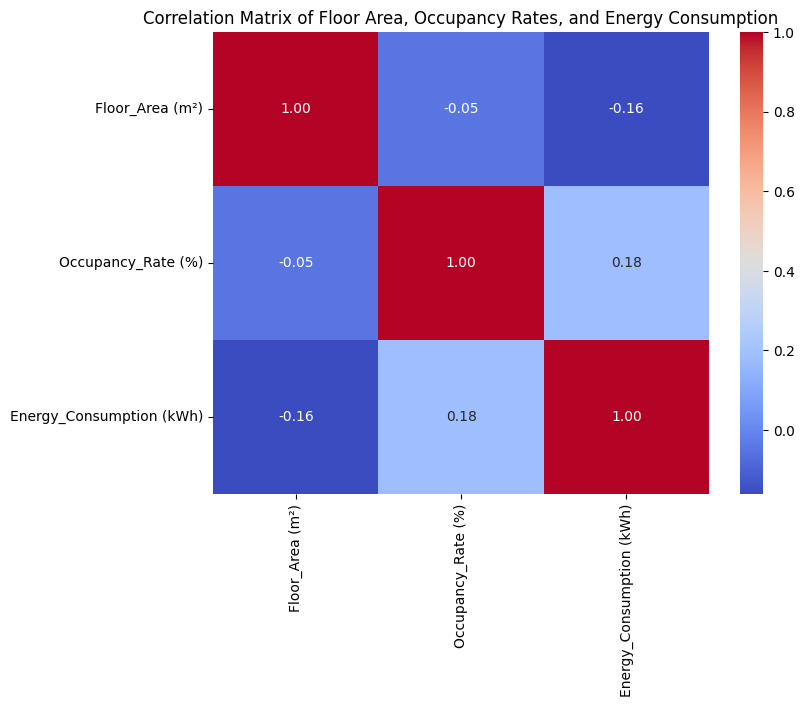

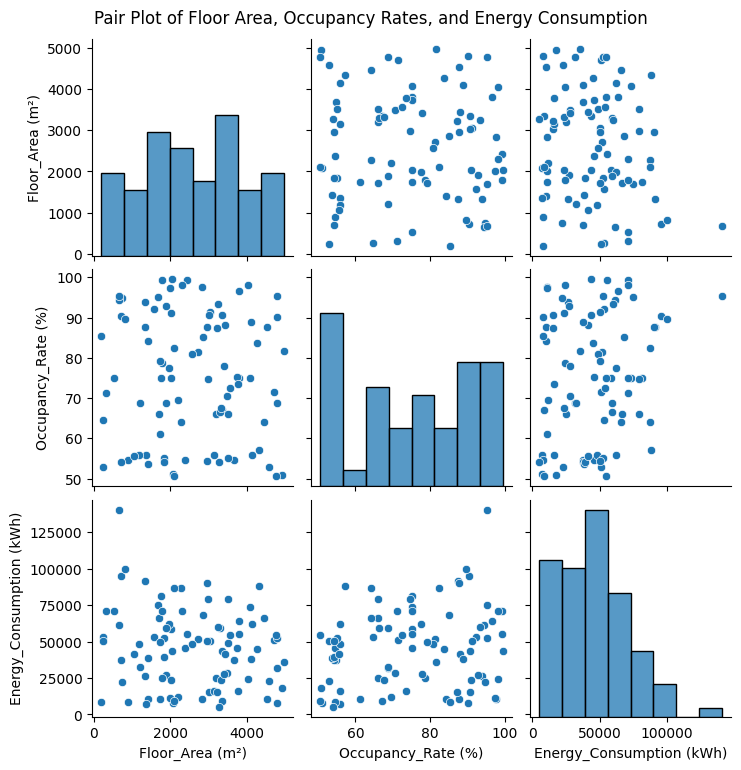

In [ ]:
# Select relevant columns
relevant_columns = df_cleaned[['Floor_Area (m²)', 'Occupancy_Rate (%)', 'Energy_Consumption (kWh)']]

# Calculate the correlation matrix
correlation_matrix = relevant_columns.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Floor Area, Occupancy Rates, and Energy Consumption')
plt.show()

# Pair plot for detailed analysis
sns.pairplot(relevant_columns)
plt.suptitle('Pair Plot of Floor Area, Occupancy Rates, and Energy Consumption', y=1.02)
plt.show()

Based on the correlation matrix heatmap of Floor Area, Occupancy Rates, and Energy Consumption, here are the key insights,


---


**1. Weak Correlations** :
The correlations between Floor Area, Occupancy Rates, and Energy Consumption are generally weak. This indicates that these variables do not strongly influence each other in this dataset.
* `Floor Area` and `Occupancy Rate`: Slightly negative correlation **(-0.05)**.
* `Floor Area` and `Energy Consumption`: Negative correlation **(-0.16)**.
* `Occupancy Rate` and `Energy Consumption`: Slight positive correlation **(0.18)**.

**2. Energy Consumption Patterns**:
* Larger floor areas tend to consume slightly less energy, which might suggest that larger spaces are more energy-efficient per unit area.
* Higher occupancy rates are associated with a slight increase in energy consumption, indicating that more people in a space lead to higher energy use.


---


The weak correlations suggest that `Floor Area`, `Occupancy Rates`, and `Energy Consumption` are not strongly interdependent. Therefore, we should consider other factors that might have a more significant impact on `Energy Consumption`, such as building design, insulation, and the efficiency of appliances and systems. Additionally, focusing on optimizing energy use based on occupancy patterns could provide some benefits, but it may not be the primary driver of our energy efficiency improvements.

##`c. Energy Consumption Trend by Region and Building Type Over Time. Elaborate on the pattern of different types of energy consumption against building type and region.`


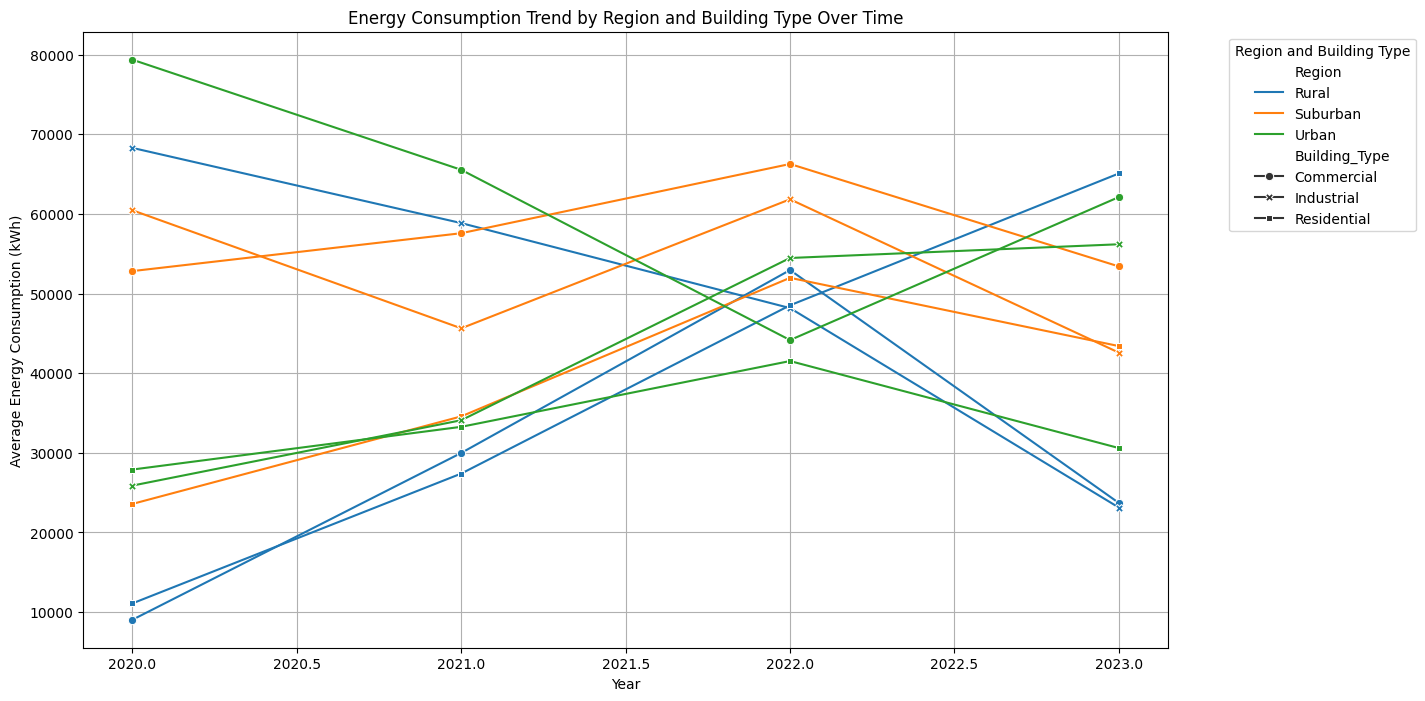

In [ ]:
# Group the data by Year, Region, and Building_Type, and calculate the average Energy Consumption
grouped_data = df_cleaned.groupby(['Year', 'Region', 'Building_Type'])['Energy_Consumption (kWh)'].mean().reset_index()

# Plot the energy consumption trend over time for different regions and building types
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Energy_Consumption (kWh)', hue='Region', style='Building_Type', data=grouped_data, markers=True, dashes=False)
plt.title('Energy Consumption Trend by Region and Building Type Over Time')
plt.xlabel('Year')
plt.ylabel('Average Energy Consumption (kWh)')
plt.legend(title='Region and Building Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Based on graph titled, “Energy Consumption Trend by Region and Building Type Over Time” reveals several key patterns,


---


**1. Urban Residential Buildings**
* There is a noticeable increase in energy consumption over time, suggesting growing energy demands possibly due to urbanization and increased population density.

**2. Suburban Commercial Buildings**
* Energy consumption shows a steady rise, indicating expanding commercial activities and possibly less efficient energy use.

**3. Rural Industrial Buildings**
* A decreasing trend in energy consumption is observed, which might be due to improvements in energy efficiency or a decline in industrial activities in rural areas.

**4. Other Trends**
* The remaining building types and regions show relatively stable or slightly fluctuating energy consumption patterns, indicating consistent energy use without significant changes.


---


Urban residential areas are experiencing increasing energy demands, while suburban commercial areas also show rising consumption. In contrast, rural industrial areas are becoming more energy-efficient or seeing reduced activity. These trends highlight the need for targeted energy efficiency measures in urban and suburban regions to manage growing energy demands effectively.